**a)  set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.**

In [ ]:
import pandas as pd

# Import the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')

In [32]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
# Select a random sample of 25 observations
sample = diabetes['Glucose'].sample(n=25, random_state=1)

In [35]:
sample

285    136
101    151
581    109
352     61
726    116
472    119
233    122
385    119
556     97
59     105
756    137
341     95
445    180
614    138
371    118
355    165
19     115
711    126
430     99
117     78
493    125
218     85
159    163
667    111
553     88
Name: Glucose, dtype: int64

In [36]:
# Calculate sample statistics
sample_mean = sample.mean()
sample_max = sample.max()
print(sample_mean)
print(sample_max)

118.32
180


In [38]:
# Calculate population statistics
pop_mean = diabetes['Glucose'].mean()
pop_max = diabetes['Glucose'].max()

In [39]:
print(pop_mean)
print(pop_max)

120.89453125
199


The above bar plot clearly shows that the mean of the sample and population glucose features is almost identical.

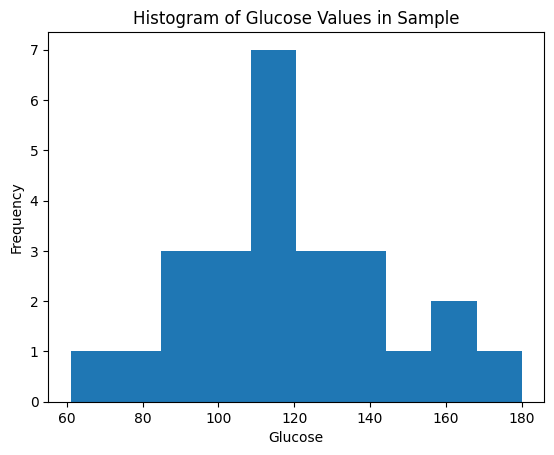

In [40]:
import matplotlib.pyplot as plt

# Create a histogram of the sample data
plt.hist(sample, bins=10)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Values in Sample')
plt.show()

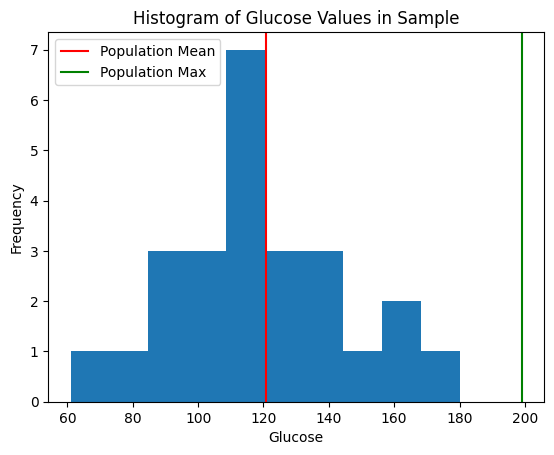

In [41]:
# Add population statistics to the histogram
plt.hist(sample, bins=10)
plt.axvline(pop_mean, color='red', label='Population Mean')
plt.axvline(pop_max, color='green', label='Population Max')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Values in Sample')
plt.legend()
plt.show()

**b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.** 

In [ ]:
# Select a random sample of 25 observations
sample = diabetes['BMI'].sample(n=25, random_state=1)

In [ ]:
sample

285    26.0
101    26.1
581    25.0
352    34.4
726    36.1
472    38.8
233    35.0
385    22.3
556    38.1
59     41.5
756    32.0
341    25.9
445    59.4
614    36.1
371     0.0
355    30.4
19     34.6
711    29.6
430    22.2
117    33.7
493    28.9
218    29.0
159    40.9
667    27.5
553    29.9
Name: BMI, dtype: float64

50.80799999999999
47.52599999999996


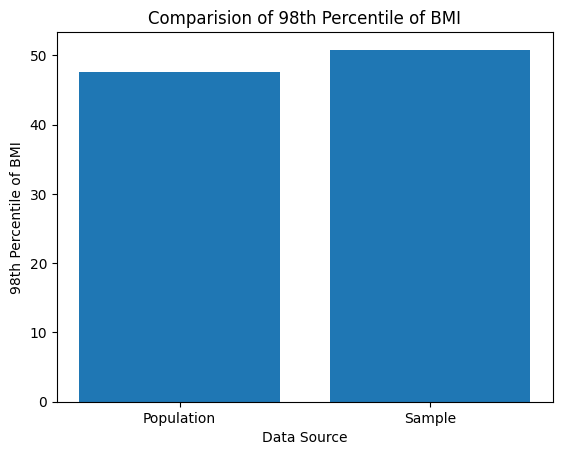

In [ ]:
# calculate the bmi values 
sample_BMI_98th_percentile = np.percentile(dfn['BMI'], 98)
population_BMI_98th_percentile = np.percentile(diabetes['BMI'], 98)

print(sample_BMI_98th_percentile)
print(population_BMI_98th_percentile)

# creating a dataframe to keep the values together.
percentile_data = [population_BMI_98th_percentile, sample_BMI_98th_percentile]
percentile_labels = ['Population', 'Sample']

# plotting a bar chart to compare the results
plt.bar(percentile_labels, percentile_data)
plt.title('Comparision of 98th Percentile of BMI')
plt.xlabel('Data Source')
plt.ylabel('98th Percentile of BMI')
plt.show()


The findings of the bar plot above reveal that the 98th percentile of both the sample and population data does not differ significantly.

**c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison.**

In [ ]:
#Write a function to calculate the statistics
#We can write a function that takes as a sample input and computes the mean,
#standard deviation, and percentile of the BloodPressure variable.

In [ ]:
def calculate_stats(sample):
    mean = sample['BloodPressure'].mean()
    std_dev = sample['BloodPressure'].std()
    percentile = np.percentile(sample['BloodPressure'], 95)
    return mean, std_dev, percentile

In [ ]:
# Write 500 bootstrap samples:
# We could use the numpy random.choice() function to Write 500 bootstrap samples of 150 observations each.

In [ ]:
import numpy as np
bootstrap_samples = []
for i in range(500):
    bootstrap_sample = np.random.choice(diabetes['BloodPressure'], size=150, replace=True)
    bootstrap_samples.append(bootstrap_sample)

In [ ]:
print(bootstrap_sample)

[ 74  76  74  64  74  72  88  62  72  50  80  58  78  44  58  68  64  88
  78  74  90  84  70  94  62  74  74  70  65  84  94  30  66  58   0  76
  82  56  68  54  84  74  48  52  76  72  90  60  65  48  84  70  54  66
  60  52  64  76  76 106 102  72  82  70  56  70  70  90  70  88  74  62
  68  62   0  88  84  82  62  78  70 122  60  90  78  60  74  82  85  80
  76  68  70  70  78  90  74  68   0  62  60  86   0  24  86  60  80  86
  70   0  76  56  92  60  40  90   0  60  88  62  90   0  74  78  68  24
  68  70  70  70  58  84   0  78  72  86  90  92  80  74  88  52  44  84
  24  80  62  84  68  56]


In [ ]:
# Calculate the statistics for each bootstrap sample
def calculate_stats(sample):
    mean = np.mean(sample)
    std_dev = np.std(sample)
    percentile = np.percentile(sample, 95)
    return mean, std_dev, percentile

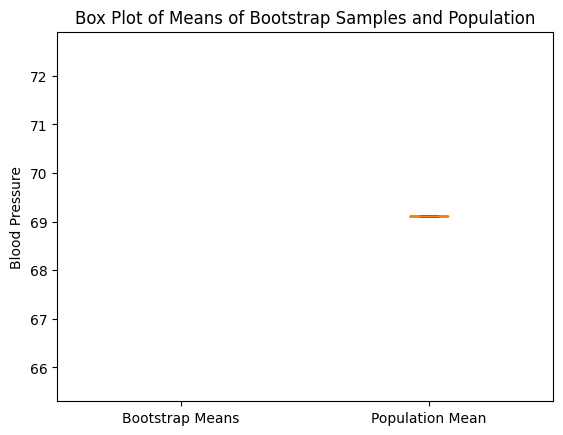

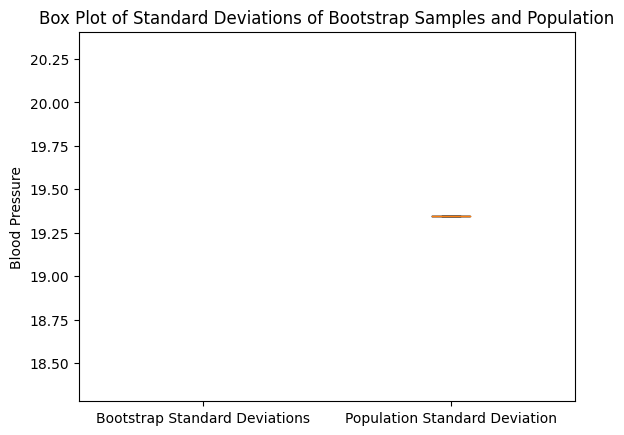

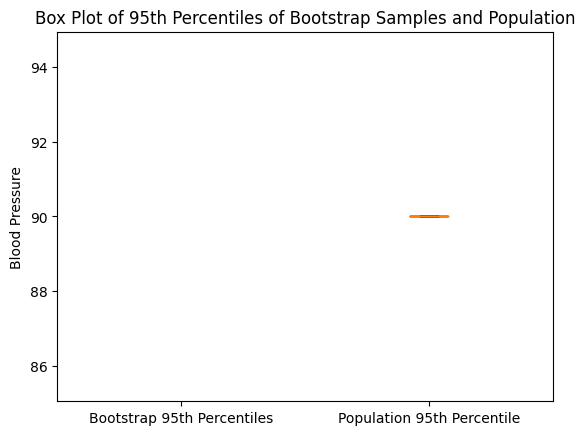

In [ ]:
# Calculate the statistics for the population data
pop_mean = np.mean(diabetes['BloodPressure'])
pop_std_dev = np.std(diabetes['BloodPressure'])
pop_percentile = np.percentile(diabetes['BloodPressure'], 95)
bootstrap_stats = ""

# Create box plots of the mean, standard deviation, and percentile for the bootstrap samples and the population data
bootstrap_means = [sample_stats[0] for sample_stats in bootstrap_stats]
bootstrap_std_devs = [sample_stats[1] for sample_stats in bootstrap_stats]
bootstrap_percentiles = [sample_stats[2] for sample_stats in bootstrap_stats]

data = [bootstrap_means, [pop_mean]*500]
plt.boxplot(data, labels=['Bootstrap Means', 'Population Mean'])
plt.ylabel('Blood Pressure')
plt.title('Box Plot of Means of Bootstrap Samples and Population')
plt.show()

data = [bootstrap_std_devs, [pop_std_dev]*500]
plt.boxplot(data, labels=['Bootstrap Standard Deviations', 'Population Standard Deviation'])
plt.ylabel('Blood Pressure')
plt.title('Box Plot of Standard Deviations of Bootstrap Samples and Population')
plt.show()

data = [bootstrap_percentiles, [pop_percentile]*500]
plt.boxplot(data, labels=['Bootstrap 95th Percentiles', 'Population 95th Percentile'])
plt.ylabel('Blood Pressure')
plt.title('Box Plot of 95th Percentiles of Bootstrap Samples and Population')
plt.show()

As we can see from the findings, the mean, standard deviation, and percentile of the sample data and the population data are almost identical. We can assume from this that for this data set, working with the sample data and the entire data set would produce about comparable outcomes.